In [3]:
ch2 = lambda x: '.'.join([str(x//(256**i)%256) for i in range(3,-1,-1)])
ch2(2566914260)

'153.0.0.212'

In [18]:
ch3 = lambda x:sum([256**j*int(i) for j,i in enumerate(x.split('.')[::-1])])
ch3('220.154.228.255')

3701138687

In [1]:
import pandas as pd
comms = pd.read_csv("/Users/weduoo/Desktop/ip_cn.csv")
comms.head()

,ip_start,ip_end,int_start,int_end,zhou,guo,sheng,shi,emp,yy,bm,dq,dqm,jing,wei
0,1.0.1.0,1.0.3.255,16777472,16778239,亚洲,中国,福建,福州,NaN,电信,350100,China,CN,119.306239,26.075302
1,1.0.8.0,1.0.15.255,16779264,16781311,亚洲,中国,广东,广州,NaN,电信,440100,China,CN,113.280637,23.125178
2,1.0.32.0,1.0.63.255,16785408,16793599,亚洲,中国,广东,广州,NaN,电信,440100,China,CN,113.280637,23.125178
3,1.1.0.0,1.1.0.255,16842752,16843007,亚洲,中国,福建,福州,NaN,电信,350100,China,CN,119.306239,26.075302
4,1.1.2.0,1.1.7.255,16843264,16844799,亚洲,中国,福建,福州,NaN,电信,350100,China,CN,119.306239,26.075302


In [2]:
sheng = comms[(174993947 >= comms["int_start"] ) & (174993947 <=comms["int_end"])]["sheng"]
print(len(sheng))

0


In [8]:
c = pd.read_csv("/Users/weduoo/Desktop/zhz_comm.csv")
c.head()

,uid,username,isvip,ip,city,content,ctime,like,replynum,source,title,subtitle,play_count
0,133664344,山东乐迷,0,717719304,北京,我爱你,1525110394,0,0,乐视网,甄嬛传01,雍正登基,52473170
1,133664344,山东乐迷,0,717719158,北京,别去万象城了,1525068315,0,0,乐视网,甄嬛传01,雍正登基,52473170
2,230290803,上海乐迷,0,1782144044,北京,这电视剧好看么,1525064917,1,0,乐视网,甄嬛传01,雍正登基,52473170
3,133664344,山东乐迷,0,3683798438,北京,功高盖主啊,1524993921,1,0,乐视网,甄嬛传01,雍正登基,52473170
4,294897684,浙江乐迷,0,3086501929,北京,为了看这个充会员。。。,1524992411,7,0,乐视网,甄嬛传01,雍正登基,52473170


In [9]:
data = c[(c["ip"] >= 16777472) & (c["ip"] <= 3758095871)]
data.head(10)

,uid,username,isvip,ip,city,content,ctime,like,replynum,source,title,subtitle,play_count
0,133664344,山东乐迷,0,717719304,北京,我爱你,1525110394,0,0,乐视网,甄嬛传01,雍正登基,52473170
1,133664344,山东乐迷,0,717719158,北京,别去万象城了,1525068315,0,0,乐视网,甄嬛传01,雍正登基,52473170
2,230290803,上海乐迷,0,1782144044,北京,这电视剧好看么,1525064917,1,0,乐视网,甄嬛传01,雍正登基,52473170
3,133664344,山东乐迷,0,3683798438,北京,功高盖主啊,1524993921,1,0,乐视网,甄嬛传01,雍正登基,52473170
4,294897684,浙江乐迷,0,3086501929,北京,为了看这个充会员。。。,1524992411,7,0,乐视网,甄嬛传01,雍正登基,52473170
5,223232041,山西乐迷,0,174993947,北京,咱两一起充一个😂😂😂,1525075352,0,0,乐视网,甄嬛传01,雍正登基,52473170
6,292083517,钮祜禄氏甄嬛,0,611245850,北京,到底哪个好心人借给我会员。,1525069872,0,0,乐视网,甄嬛传01,雍正登基,52473170
7,292083517,钮祜禄氏甄嬛,0,2028289177,北京,哪位好心人能借一下会员，我真的很想看甄嬛传。,1524992190,7,2,乐视网,甄嬛传01,雍正登基,52473170
8,34675040,山西乐迷,0,1984927825,北京,回来重温经典。,1524987073,1,0,乐视网,甄嬛传01,雍正登基,52473170
9,292083517,钮祜禄氏甄嬛,0,2028289177,北京,，谁能借用一下会员？,1524985934,4,0,乐视网,甄嬛传01,雍正登基,52473170


In [10]:
from tqdm import tqdm
def convert_ip(ip):
    city = comms[(ip >= comms["int_start"] ) & (ip <=comms["int_end"])]["sheng"]
    if len(city) > 0:
        return city.values[0]
    else:
        return "局域"
ips = []
for ip in tqdm(data["ip"]):
    ips.append(convert_ip(ip))
data["ip_city"] = ips
data.head()

100%|██████████| 602147/602147 [15:38<00:00, 641.37it/s]
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,uid,username,isvip,ip,city,content,ctime,like,replynum,source,title,subtitle,play_count,ip_city
0,133664344,山东乐迷,0,717719304,北京,我爱你,1525110394,0,0,乐视网,甄嬛传01,雍正登基,52473170,山东
1,133664344,山东乐迷,0,717719158,北京,别去万象城了,1525068315,0,0,乐视网,甄嬛传01,雍正登基,52473170,山东
2,230290803,上海乐迷,0,1782144044,北京,这电视剧好看么,1525064917,1,0,乐视网,甄嬛传01,雍正登基,52473170,云南
3,133664344,山东乐迷,0,3683798438,北京,功高盖主啊,1524993921,1,0,乐视网,甄嬛传01,雍正登基,52473170,山东
4,294897684,浙江乐迷,0,3086501929,北京,为了看这个充会员。。。,1524992411,7,0,乐视网,甄嬛传01,雍正登基,52473170,浙江


In [84]:
import matplotlib.pyplot as plt
from pyecharts import Pie
from pyecharts import online

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 让 pyecharts 在 jupyter 下载时有图片
online()

y = data["ip_city"].value_counts()
pie = Pie("甄嬛传评论数量地区占比",title_pos='center',height=550)
pie.add("", list(y.index), y, is_label_show=True,legend_pos='left',is_legend_show=False,radius=[45, 70])
pie

In [ ]:
from pyecharts import Map
import numpy as np
print(list(y.index))
print(list(y))
map = Map("甄嬛传评论地区分布图", width=800, height=600)
map.add("", list(y.index), np.array(y)/1000, maptype='china', is_visualmap=True,is_label_show=True,
        visual_text_color='#000')
map.render()

In [39]:
d = pd.read_csv("/Users/weduoo/Desktop/hls_comm.csv")

In [40]:
hls = d[(d["ip"] >= 16777472) & (d["ip"] <= 3758095871)]
hls.head()

,uid,username,isvip,ip,city,content,ctime,like,replynum,source,title,subtitle,play_count
0,146382383,木槿花半夏如烟_117,0,989060723,北京,3什么时候出来,1525055066,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230
1,292862768,山东乐迷,0,3747649114,北京,杨紫好不要脸,1524961474,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230
2,254666320,山西乐迷,0,3082574191,北京,刘，，，，人家都回家了，你哪？不是还有个弟弟吗？自私的自己跑国外了。,1524884950,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230
3,254666320,山西乐迷,0,3082574191,北京,刘你是我的偶像，不要让我看不起你哦，你该是魏的，不是包的，要是那样，我马上关机，再也不看你的所有,1524884661,2,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230
4,222676709,黑龙江乐迷,0,2071798885,北京,废话呵呵刚刚好,1525009348,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230


In [71]:
ip_hls = []
for ip in tqdm(hls["ip"]):
    ip_hls.append(convert_ip(ip))
hls["ip_city"] = ip_hls
hls.head()

100%|██████████| 129008/129008 [03:22<00:00, 638.30it/s]


,uid,username,isvip,ip,city,content,ctime,like,replynum,source,title,subtitle,play_count,ip_city_reg,ip_city
0,146382383,木槿花半夏如烟_117,0,989060723,北京,3什么时候出来,1525055066,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,局域,安徽
1,292862768,山东乐迷,0,3747649114,北京,杨紫好不要脸,1524961474,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,局域,山东
2,254666320,山西乐迷,0,3082574191,北京,刘，，，，人家都回家了，你哪？不是还有个弟弟吗？自私的自己跑国外了。,1524884950,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,局域,山西
3,254666320,山西乐迷,0,3082574191,北京,刘你是我的偶像，不要让我看不起你哦，你该是魏的，不是包的，要是那样，我马上关机，再也不看你的所有,1524884661,2,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,局域,山西
4,222676709,黑龙江乐迷,0,2071798885,北京,废话呵呵刚刚好,1525009348,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,NaN,北京


In [33]:
from pyecharts import Pie
hls_y = hls["ip_city"].value_counts()
pie = Pie("欢乐颂地区评论数占比分布",title_pos='center',height=550)
pie.add("", list(hls_y.index), hls_y, is_label_show=True,legend_pos='left',is_legend_show=False,radius=[45, 70])
pie

In [ ]:
from pyecharts import Map
print(list(hls_y.index))
print(list(hls_y))
map = Map("欢乐颂评论地区分布图", width=800, height=600)
map.add("", list(hls_y.index), np.array(hls_y)/100, maptype='china', is_visualmap=True,is_label_show=True,
        visual_text_color='#000')
map

In [53]:
def convert_ip_bj(ip):
    temp = comms[(ip >= comms["int_start"] ) & (ip <=comms["int_end"])]
    city = temp["shi"]
    if len(city) > 0 and city.values[0] == "北京":
        return temp["emp"].values[0]
    else:
        return "局域"
ips_bj = []
for ip in tqdm(hls["ip"]):
    ips_bj.append(convert_ip_bj(ip))

100%|██████████| 129008/129008 [03:25<00:00, 628.44it/s]


In [54]:
hls["ip_city_reg"] = ips_bj
hls.head()

,uid,username,isvip,ip,city,content,ctime,like,replynum,source,title,subtitle,play_count,ip_city_reg
0,146382383,木槿花半夏如烟_117,0,989060723,北京,3什么时候出来,1525055066,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,局域
1,292862768,山东乐迷,0,3747649114,北京,杨紫好不要脸,1524961474,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,局域
2,254666320,山西乐迷,0,3082574191,北京,刘，，，，人家都回家了，你哪？不是还有个弟弟吗？自私的自己跑国外了。,1524884950,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,局域
3,254666320,山西乐迷,0,3082574191,北京,刘你是我的偶像，不要让我看不起你哦，你该是魏的，不是包的，要是那样，我马上关机，再也不看你的所有,1524884661,2,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,局域
4,222676709,黑龙江乐迷,0,2071798885,北京,废话呵呵刚刚好,1525009348,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,NaN


In [64]:
hls_y = hls["ip_city_reg"].value_counts()
print(list(hls_y))
print(list(hls_y.index))

pie = Pie("欢乐颂评论北京区域占比分布",height=550)
pie.add("", list(hls_y.index)[1:], list(hls_y)[1:], is_label_show=True,
        legend_pos='left',is_legend_show=False,radius=[40, 70])
pie

[108176, 3233, 582, 213, 158, 85, 67, 58, 44, 37, 36, 33, 32, 10, 5, 3, 2]
['局域', '海淀', '朝阳', '西城', '丰台', '昌平', '大兴', '东城', '石景山', '房山', '通州', '密云', '顺义', '平谷', '门头沟', '延庆', '怀柔']


In [62]:
ips_zhz_bj = []
for ip in tqdm(data["ip"]):
    ips_zhz_bj.append(convert_ip_bj(ip))
data["ip_city_reg"] = ips_zhz_bj
data.head()

100%|██████████| 602147/602147 [17:11<00:00, 583.99it/s]
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,uid,username,isvip,ip,city,content,ctime,like,replynum,source,title,subtitle,play_count,ip_city,ip_city_reg
0,133664344,山东乐迷,0,717719304,北京,我爱你,1525110394,0,0,乐视网,甄嬛传01,雍正登基,52473170,山东,局域
1,133664344,山东乐迷,0,717719158,北京,别去万象城了,1525068315,0,0,乐视网,甄嬛传01,雍正登基,52473170,山东,局域
2,230290803,上海乐迷,0,1782144044,北京,这电视剧好看么,1525064917,1,0,乐视网,甄嬛传01,雍正登基,52473170,云南,局域
3,133664344,山东乐迷,0,3683798438,北京,功高盖主啊,1524993921,1,0,乐视网,甄嬛传01,雍正登基,52473170,山东,局域
4,294897684,浙江乐迷,0,3086501929,北京,为了看这个充会员。。。,1524992411,7,0,乐视网,甄嬛传01,雍正登基,52473170,浙江,局域


In [68]:
y = data["ip_city_reg"].value_counts()
print(list(y))
print(list(y.index))
pie = Pie("甄嬛传评论北京地区占比",height=550)
pie.add("", list(y.index)[1:], y[1:], is_label_show=True,legend_pos='left',is_legend_show=False,radius=[45, 70])
pie

[528935, 13082, 4502, 831, 789, 657, 474, 438, 295, 260, 196, 171, 170, 139, 136, 101, 57]
['局域', '海淀', '朝阳', '丰台', '昌平', '西城', '东城', '大兴', '顺义', '通州', '石景山', '房山', '密云', '门头沟', '平谷', '延庆', '怀柔']


In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def create_wordcloud(text):
    # 用于支持中文的设置
    font = '/Library/Fonts/Songti.ttc'
    wordcloud = WordCloud(background_color="white",font_path=font,\
                          width=1000, height=1000, margin=2).generate(text)
    # 生成图片
    plt.figure(figsize=(14,14))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [81]:
hls.head()

,uid,username,isvip,ip,city,content,ctime,like,replynum,source,title,subtitle,play_count,ip_city_reg,ip_city
0,146382383,木槿花半夏如烟_117,0,989060723,北京,3什么时候出来,1525055066,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,局域,安徽
1,292862768,山东乐迷,0,3747649114,北京,杨紫好不要脸,1524961474,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,局域,山东
2,254666320,山西乐迷,0,3082574191,北京,刘，，，，人家都回家了，你哪？不是还有个弟弟吗？自私的自己跑国外了。,1524884950,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,局域,山西
3,254666320,山西乐迷,0,3082574191,北京,刘你是我的偶像，不要让我看不起你哦，你该是魏的，不是包的，要是那样，我马上关机，再也不看你的所有,1524884661,2,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,局域,山西
4,222676709,黑龙江乐迷,0,2071798885,北京,废话呵呵刚刚好,1525009348,0,0,乐视网,欢乐颂2 01,小包总裸身狂撩安迪,8102230,NaN,北京


100%|██████████| 20832/20832 [00:00<00:00, 188374.74it/s]


20832


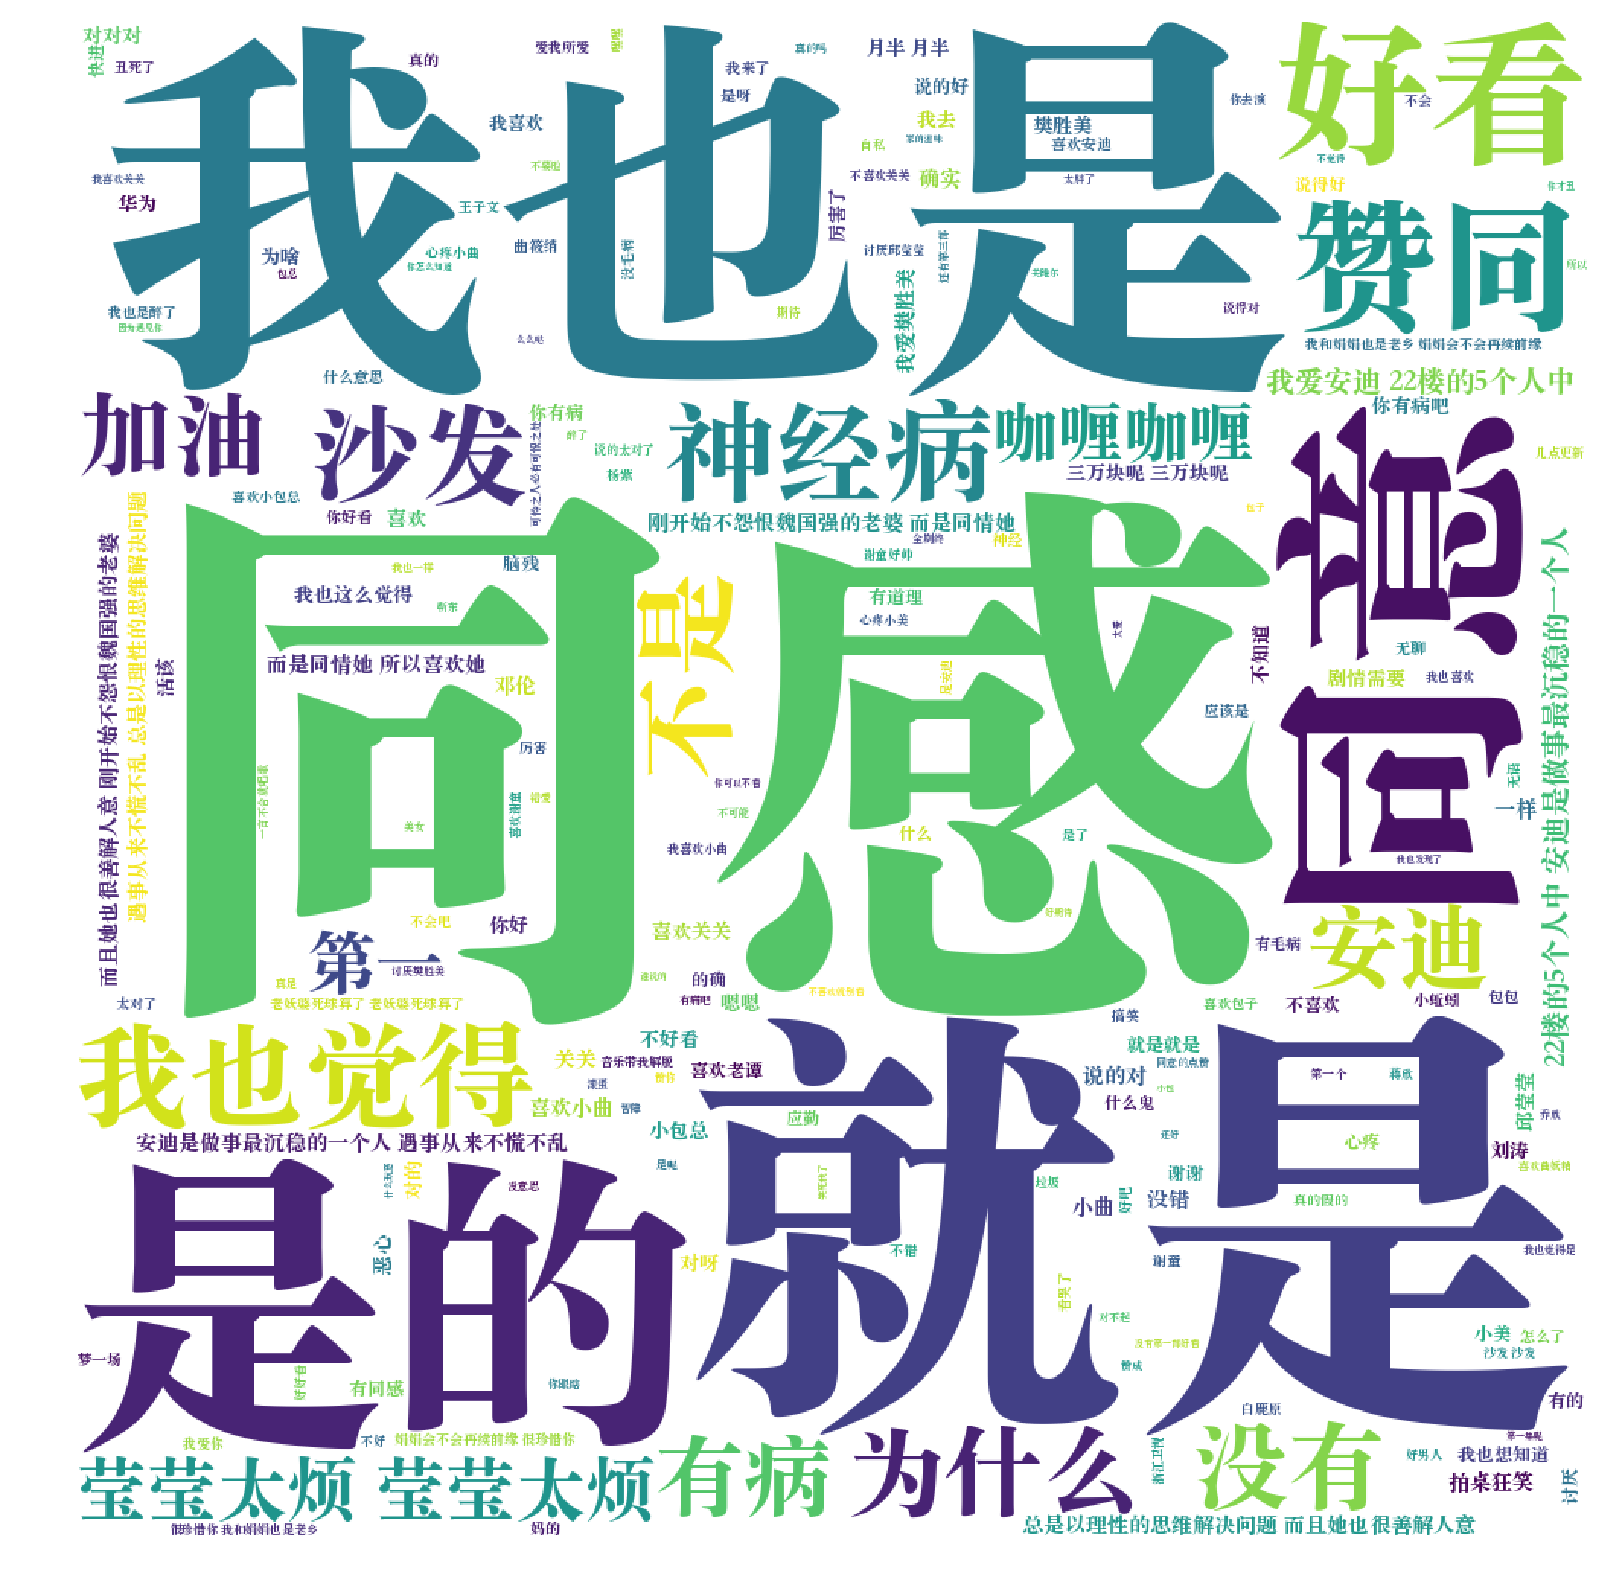

In [83]:
import re
hls_pl_text = [] 
def remove_words(txt):
    words = ["哈","呵","啦","啊","皇上","甄","嬛","弹幕呢"]
    for word in words:
        txt = txt.replace(word,"")
    return txt
hls_bj_pl = hls[hls["ip_city"]=="北京"]
for text in tqdm(list(hls_bj_pl["content"])):
    t = remove_words(str(text))
    t = re.sub('[a-zA-Z]','', t)
    hls_pl_text.append(t.strip())
create_wordcloud("\n".join(hls_pl_text))

100%|██████████| 602147/602147 [00:02<00:00, 240951.73it/s]


602147


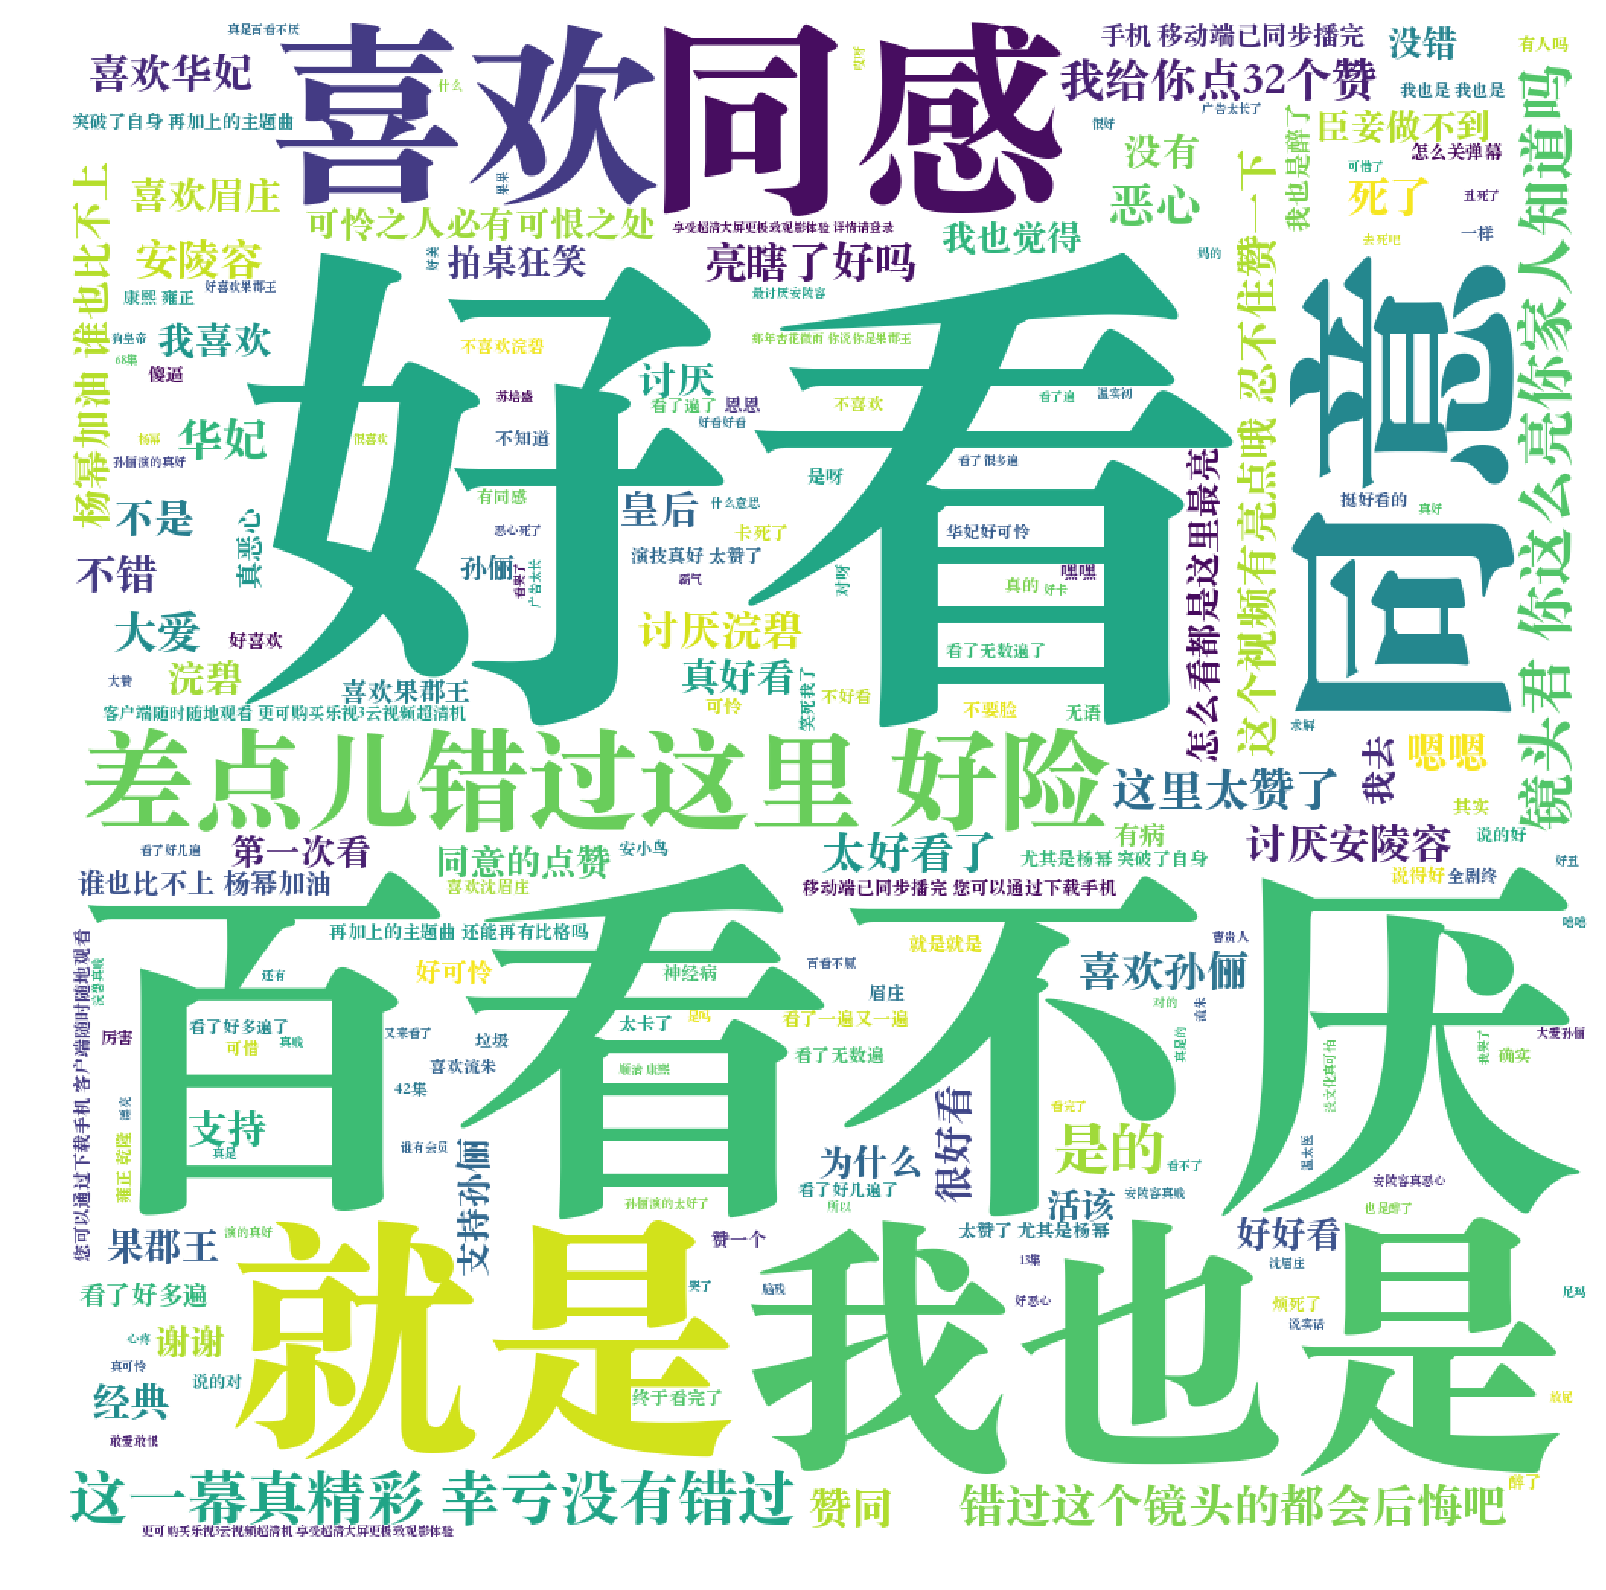

In [87]:
import re
zhz_pl_bj = [] 
def remove_words(txt):
    words = ["哈","呵","啦","啊","皇上","甄","嬛","弹幕呢"]
    for word in words:
        txt = txt.replace(word,"")
    return txt
zhz_bj_pl = data[data["ip_city"]=="北京"]
for text in tqdm(list(data["content"])):
    t = remove_words(str(text))
    t = re.sub('[a-zA-Z]','', t)
    zhz_pl_bj.append(t.strip())
print(len(zhz_pl_bj))
create_wordcloud("\n".join(zhz_pl_bj))